In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# استيراد المكتبات الأساسية
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
 # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

#SPLITTING DATA

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape



(10000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

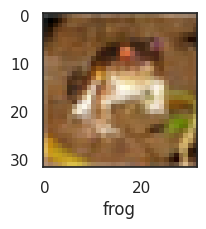

In [ ]:
plot_sample(X_train, y_train, 0)


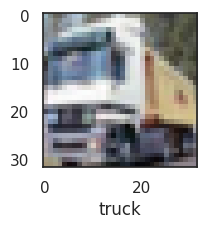

In [ ]:
plot_sample(X_train, y_train, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ONE HOT ENCODING

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test= to_categorical(y_test, num_classes=10)



#CHECK DIMMENSION OF ENCODING

In [ ]:
print(f"y_train_one_hot shape: {y_train.shape}")  # (50000, 10)
print(f"y_test_one_hot shape: {y_test.shape}")  # (10000, 10)

# تحقق من بعض الصفوف في y_train_one_hot
print("Sample of y_train_one_hot:")
print(y_train[0])  # يجب أن تكون مثلا [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] إذا كانت الفئة 0
print(y_train[1])  # يجب أن تكون مثلا [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] إذا كانت الفئة 1
print(y_train[2])  # وهكذا


y_train_one_hot shape: (50000, 10)
y_test_one_hot shape: (10000, 10)
Sample of y_train_one_hot:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعة تدريب ومجموعة تحقق
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# تحقق من الأبعاد بعد التقسيم
print(f"X_train_split shape: {X_train_split.shape}")
print(f"X_val_split shape: {X_val_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"y_val_split shape: {y_val_split.shape}")

X_train_split shape: (40000, 32, 32, 3)
X_val_split shape: (10000, 32, 32, 3)
y_train_split shape: (40000, 10)
y_val_split shape: (10000, 10)


#BUILD CNN MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# تصميم CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# ملخص النموذج
model.summary()

# إعداد Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# إعداد التدريب
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# التدريب
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,170 (1.04 MB)

 Trainable params: 271,978 (1.04 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 61ms/step - accuracy: 0.2117 - loss: 2.2635 - val_accuracy: 0.3877 - val_loss: 1.6368 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 52ms/step - accuracy: 0.3399 - loss: 1.7342 - val_accuracy: 0.4580 - val_loss: 1.4211 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4502 - loss: 1.4986 - val_accuracy: 0.5319 - val_loss: 1.2976 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5305 - loss: 1.3152 - val_accuracy: 0.6347 - val_loss: 1.0291 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5800 - loss: 1.1979 - val_accuracy: 0.6239 - val_loss: 1.0619 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6044 - loss: 1.1277 - val_accuracy: 0.5974 - val_loss: 1.2069 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6206 - l

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),  # تعديل MaxPooling

    # Block 2
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),  # تعديل MaxPooling

    # Block 3
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),  # تعديل MaxPooling

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,914 (4.90 MB)

 Trainable params: 1,283,018 (4.89 MB)

 Non-trainable params: 896 (3.50 KB)

# PREPAIRING DATA

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# تجهيز البيانات
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# إعداد Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# إعداد النموذج للتدريب
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # معدل تعلم منخفض لتحسين الأداء
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# تدريب النموذج
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# تحميل أفضل نموذج
best_model = tf.keras.models.load_model('best_model.keras')




Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2924 - loss: 1.9555
Epoch 1: val_accuracy improved from -inf to 0.44250, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.2925 - loss: 1.9553 - val_accuracy: 0.4425 - val_loss: 1.5991 - learning_rate: 5.0000e-04
Epoch 2/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4678 - loss: 1.4869
Epoch 2: val_accuracy improved from 0.44250 to 0.53710, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.4678 - loss: 1.4867 - val_accuracy: 0.5371 - val_loss: 1.3381 - learning_rate: 5.0000e-04
Epoch 3/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5443 - loss: 1.2967
Epoch 3: val_accuracy improved from 0.53710 to 0.60630, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5444 - loss: 1.2965 - val_accuracy: 0.6063 - val_loss: 1.1264 - learning_rate: 5.0000e-04
Epoch 4/50
781/782 ━━━━━━━━━━━━━━━

# DRAW ACCURACY

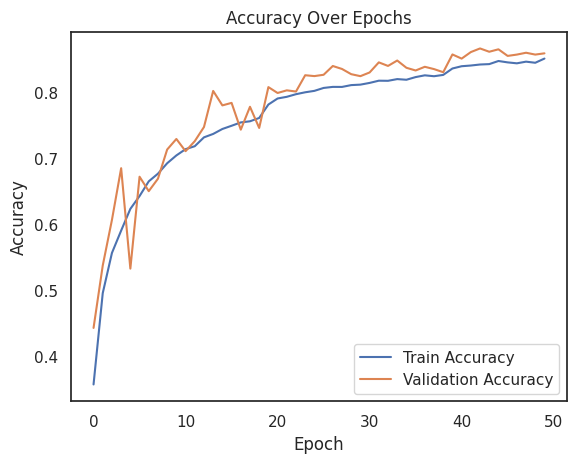

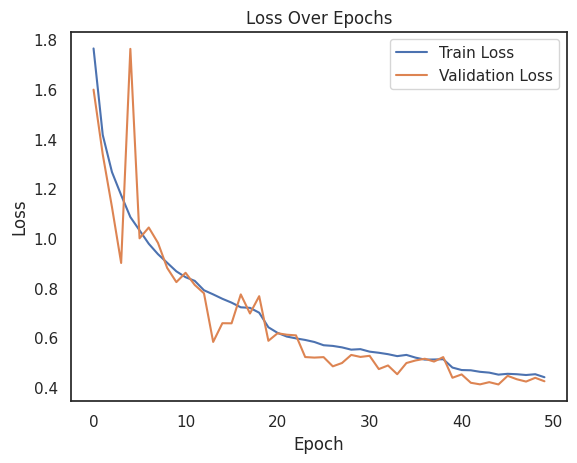

In [ ]:
import matplotlib.pyplot as plt

# رسم الدقة
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [ ]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.4127
Test Loss: 0.4115050435066223
Test Accuracy: 0.866100013256073


# PREDICTION

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# توقع الفئات
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# تقرير التصنيف
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Confusion Matrix:
[[858  21  25   8   6   1   1  11  34  35]
 [  4 954   1   0   2   0   1   1   6  31]
 [ 32   4 818  21  33  21  30  28   4   9]
 [ 10  11  36 688  43 103  43  34  19  13]
 [  5   1  30  11 857   8  32  47   5   4]
 [  3   8  18  85  19 784  21  48   1  13]
 [  7   5  17  18  11   4 919   7   5   7]
 [  6   0  10  10  18  14   2 929   2   9]
 [ 40  18   2   0   0   1   2   1 911  25]
 [  5  37   0   1   0   1   2   1  10 943]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.90      0.95      0.93      1000
           2       0.85      0.82      0.84      1000
           3       0.82      0.69      0.75      1000
           4       0.87      0.86      0.86      1000
           5       0.84      0.78      0.81      1000
           6       0.87      0.92      0.90      1000
           7       0.84      0.93      0.88      1000


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')  # استخدم 'micro' أو 'macro' حسب الحاجة
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8652110153017216
Recall: 0.8661
F1 Score: 0.8644246329874155


#UPLOAD BEST MODEL

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best_model (1).keras to best_model (1).keras


In [ ]:
best_model = tf.keras.models.load_model('best_model (1).keras')
print("Model loaded successfully!")



Model loaded successfully!


In [ ]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 155ms/step - accuracy: 0.8656 - loss: 0.4160
Test Loss: 0.41542378067970276
Test Accuracy: 0.8658000230789185


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


#HYPER PARAMETERS

In [ ]:
# Install Keras Tuner if not already installed
# !pip install keras-tuner

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
import shutil

# Define HyperModel
class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential([
            # Block 1
            Conv2D(hp.Int('filters_block1', 32, 128, step=32), (3, 3), activation='relu', input_shape=(32, 32, 3)),
            BatchNormalization(),
            Conv2D(hp.Int('filters_block1', 32, 128, step=32), (3, 3), activation='relu'),
            MaxPooling2D((2, 2), padding='same'),

            # Block 2
            Conv2D(hp.Int('filters_block2', 64, 256, step=64), (3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(hp.Int('filters_block2', 64, 256, step=64), (3, 3), activation='relu'),
            MaxPooling2D((2, 2), padding='same'),

            # Block 3
            Conv2D(hp.Int('filters_block3', 128, 512, step=128), (3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(hp.Int('filters_block3', 128, 512, step=128), (3, 3), activation='relu'),
            MaxPooling2D((2, 2), padding='same'),

            # Global Average Pooling
            GlobalAveragePooling2D(),

            # Fully Connected Layers
            Dense(hp.Int('dense_units', 256, 1024, step=256), activation='relu'),
            Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)),
            Dense(10, activation='softmax')
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Setup Tuner
tuner = RandomSearch(
    CNNHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',  # All search results saved here
    project_name='cifar10_cnn_tuning'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Perform Search
tuner.search(
    datagen.flow(X_train[:10000], y_train[:10000], batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping]
)

# Save the search results as a zip file
shutil.make_archive('hyperparameter_tuning', 'zip', 'hyperparameter_tuning')

print("Hyperparameter search completed. Results saved in 'hyperparameter_tuning.zip'.")
from google.colab import files
files.download('hyperparameter_tuning.zip')


Trial 10 Complete [00h 01m 52s]
val_accuracy: 0.4997999966144562

Best val_accuracy So Far: 0.5662999749183655
Total elapsed time: 00h 18m 43s
Hyperparameter search completed. Results saved in 'hyperparameter_tuning.zip'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Get the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Define callbacks
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model with the selected callbacks
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# Save the final model and training history
model.save('final_model.keras')

from google.colab import files
files.download('final_model.keras')

Epoch 1/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3115 - loss: 1.9134
Epoch 1: val_accuracy improved from -inf to 0.44400, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step - accuracy: 0.3117 - loss: 1.9129 - val_accuracy: 0.4440 - val_loss: 1.6085 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4923 - loss: 1.4186
Epoch 2: val_accuracy improved from 0.44400 to 0.55200, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.4923 - loss: 1.4185 - val_accuracy: 0.5520 - val_loss: 1.2848 - learning_rate: 0.0010
Epoch 3/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5587 - loss: 1.2450
Epoch 3: val_accuracy improved from 0.55200 to 0.59960, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5587 - loss: 1.2449 - val_accuracy: 0.5996 - val_loss: 1.1438 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 50m

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

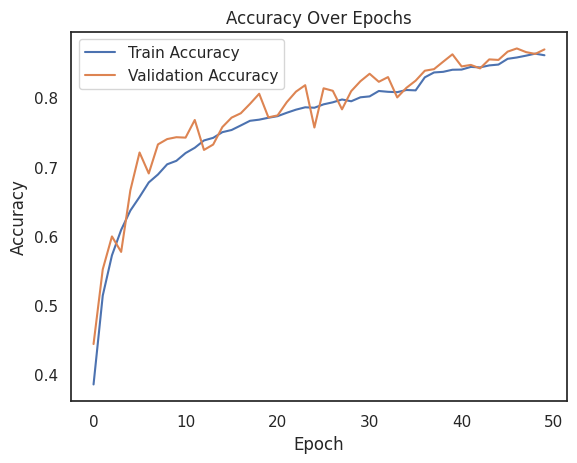

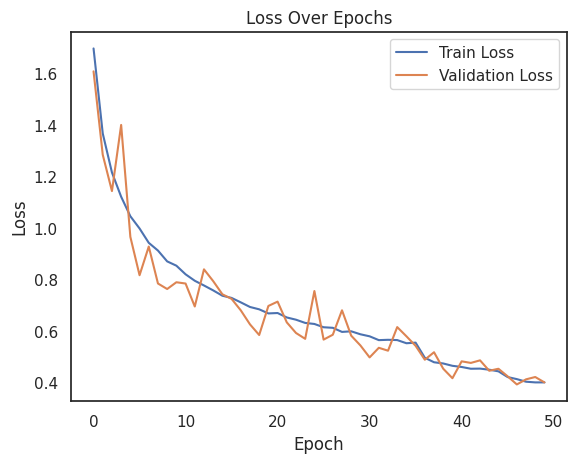

In [ ]:
import matplotlib.pyplot as plt

# رسم الدقة
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [ ]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8713 - loss: 0.3875
Test Loss: 0.39320528507232666
Test Accuracy: 0.8712999820709229


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# توقع الفئات
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# تقرير التصنيف
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Confusion Matrix:
[[887  17   9   6   5   1   2   7  25  41]
 [  4 956   1   0   0   0   1   1   2  35]
 [ 33  12 805  24  30  30  35  15   4  12]
 [ 11  10  20 708  42  89  50  30  10  30]
 [  5   1  26  16 866  13  30  31   7   5]
 [  5   7  13  76  24 790  21  43   1  20]
 [  7   7   9  18  10   1 934   4   4   6]
 [  5   5   8   7  15  11   6 929   0  14]
 [ 40  29   1   3   1   0   1   0 902  23]
 [ 10  48   0   0   0   0   2   0   4 936]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.88      0.96      0.91      1000
           2       0.90      0.81      0.85      1000
           3       0.83      0.71      0.76      1000
           4       0.87      0.87      0.87      1000
           5       0.84      0.79      0.82      1000
           6       0.86      0.93      0.90      1000
           7       0.88      0.93      0.90      1000


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')  # استخدم 'micro' أو 'macro' حسب الحاجة
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8715376794440113
Recall: 0.8713
F1 Score: 0.8698725126040027


# CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[887  17   9   6   5   1   2   7  25  41]
 [  4 956   1   0   0   0   1   1   2  35]
 [ 33  12 805  24  30  30  35  15   4  12]
 [ 11  10  20 708  42  89  50  30  10  30]
 [  5   1  26  16 866  13  30  31   7   5]
 [  5   7  13  76  24 790  21  43   1  20]
 [  7   7   9  18  10   1 934   4   4   6]
 [  5   5   8   7  15  11   6 929   0  14]
 [ 40  29   1   3   1   0   1   0 902  23]
 [ 10  48   0   0   0   0   2   0   4 936]]


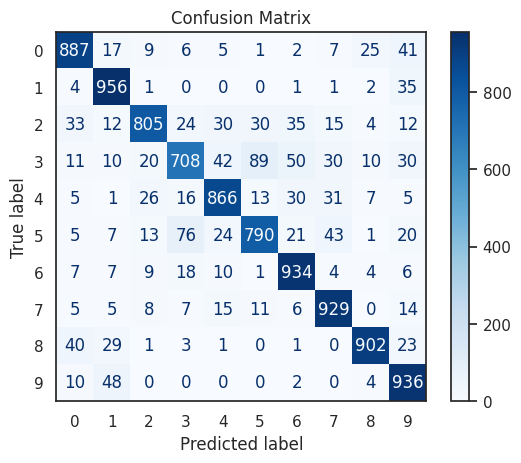

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# توقع الفئات
y_pred = np.argmax(model.predict(X_test), axis=1)  # توقع الفئات النهائية
y_true = np.argmax(y_test, axis=1)  # الفئات الحقيقية

# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)

# عرض مصفوفة الالتباس
print("Confusion Matrix:")
print(cm)

# عرضها بشكل رسومي
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))  # ضع عدد الفئات هنا
disp.plot(cmap='Blues', values_format='d')
disp.ax_.set_title("Confusion Matrix")
plt.show()


# ERRORS

Predicted: 1
True: 8


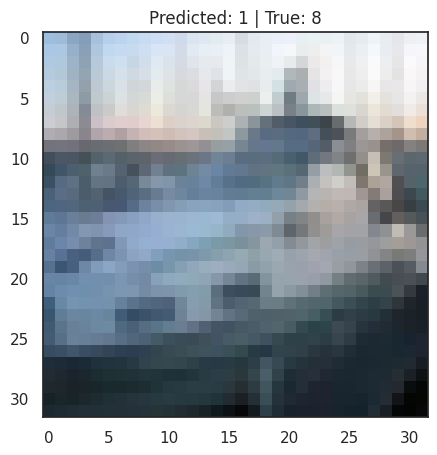

Predicted: 8
True: 0


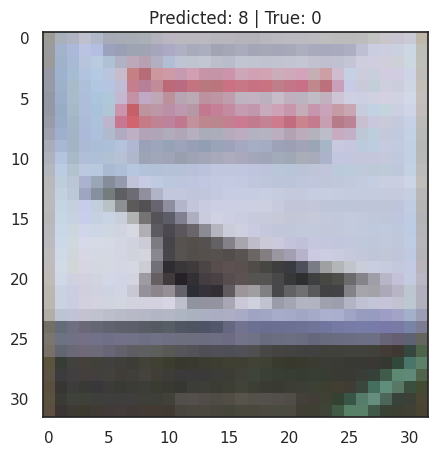

Predicted: 9
True: 1


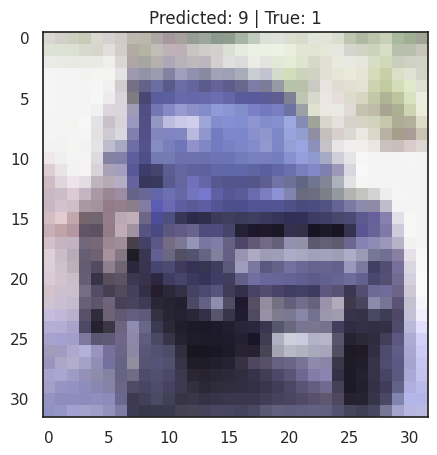

Predicted: 9
True: 7


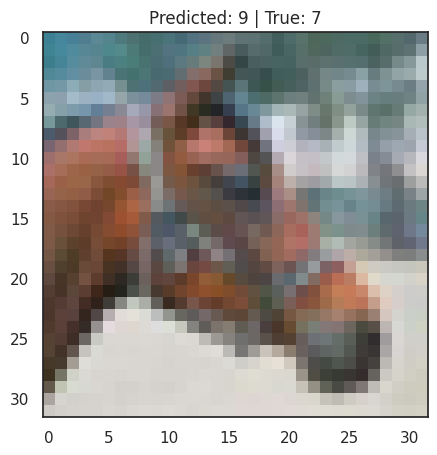

Predicted: 4
True: 5


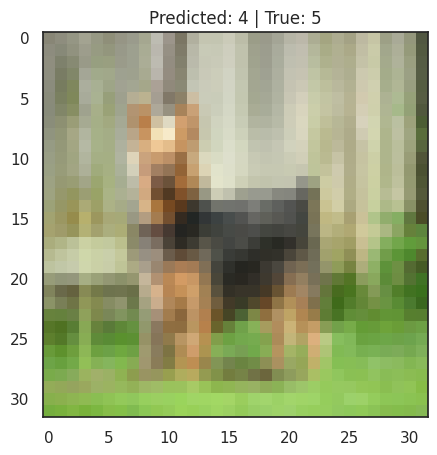

In [ ]:
import matplotlib.pyplot as plt

# الحصول على الأخطاء (الاختلاف بين الفئات المتنبأ بها والفئات الحقيقية)
errors = (y_pred != y_true)

# استخراج القيم التي تحتوي على أخطاء
y_pred_classes_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

# عرض بعض من الصور التي تحتوي على أخطاء
for i in range(5):  # عرض أول 5 صور تحتوي على أخطاء
    print("Predicted:", y_pred_classes_errors[i])
    print("True:", y_true_errors[i])

    # زيادة حجم الصورة لتحسين الوضوح
    plt.figure(figsize=(5,5))

    # عرض الصورة مع ضبط العرض والارتفاع
    plt.imshow(X_test_errors[i])

    # إضافة العنوان للصورة
    plt.title(f"Predicted: {y_pred_classes_errors[i]} | True: {y_true_errors[i]}")
    plt.show()

# IMPORT BEST MODEL OF KERAS

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_model.keras to final_model.keras


In [ ]:
best_model = tf.keras.models.load_model('final_model.keras')
print("Model loaded successfully!")



Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 50 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 46 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8713 - loss: 0.3875
Test Loss: 0.39320528507232666
Test Accuracy: 0.8712999820709229


In [ ]:
# Necessary Dependencies
import numpy as np
import pandas as pd
!pip install utils
from utils import *
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
# DenseNet Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
print('Started')

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=883c3af0dbc2cef7f68444ff0249221f1d7932c89be44ece1900199fc79c37ff
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
Started


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, VGG16, MobileNet, Xception, ResNet50

# DenseNet121 Model
def create_densenet_model():
    densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    densenet_model.trainable = False  # Freeze layers
    model = tf.keras.Sequential([
        densenet_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(15, activation='softmax')  # Assuming 10 classes for example
    ])
    return model
    densenet = create_densenet_model()
    densenet.summary()
    densenet_model.print('accuracy')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121, VGG16, MobileNetV2, Xception, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Parameters
image_size = (224, 224)
num_classes = 15  # CIFAR-10 has 10 classes
batch_size = 16

# Create TensorFlow Dataset with resizing in the pipeline
def preprocess_images(image, label):
    image = tf.image.resize(image, image_size)  # Resize each image
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(preprocess_images).shuffle(buffer_size=1024).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(preprocess_images).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# List of pretrained models
pretrained_models = [
    (DenseNet121, "DenseNet121"),
    (VGG16, "VGG16"),
    (MobileNetV2, "MobileNetV2"),
    (Xception, "Xception"),
    (ResNet50, "ResNet50"),
]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# تحسين Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)  # تأكد من وجود X_train بشكل صحيح


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# تحميل VGG16 بدون الطبقات العلوية
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# بناء النموذج
model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# تجميد الطبقات
vgg16_base.trainable = False

# Compile
model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history_vgg16 = model_vgg16.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

# Evaluation
_, vgg16_acc = model_vgg16.evaluate(X_test, y_test, verbose=0)
print(f"VGG16 Accuracy: {vgg16_acc:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.3201 - loss: 1.9055 - val_accuracy: 0.4948 - val_loss: 1.4476
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - accuracy: 0.4361 - loss: 1.5888 - val_accuracy: 0.5020 - val_loss: 1.4081
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4564 - loss: 1.5431 - val_accuracy: 0.5272 - val_loss: 1.3385
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4673 - loss: 1.5088 - val_accuracy: 0.5381 - val_loss: 1.3186
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4701 - loss: 1.5000 - val_accuracy: 0.5205 - val_loss: 1.3370
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4726 - loss: 1.4921 - val_accuracy: 0.5305 - val_loss: 1.3165
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4782 - loss: 1.4776 - val_accuracy: 0.5453 - val_loss: 1.2849
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4793 - loss: 1.4725 - val_accurac